### Preprocesing

In [1]:
# import libraries
import pandas as pd
import numpy as np

# import libraries for plot
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# loading the cleared data frame from feature selection
df = pd.read_csv('pokemon.csv')

In [47]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [49]:
# Drop the 'Name' column
df = df.drop(columns=['Name'])

# Display the updated dataset
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [50]:
# Print unique values for each feature
for column in df.columns:
    if column == 'Type 1':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")
        
    if column == 'Type 2':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

Unique values for Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Unique values for Type 2: ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [51]:
# map the type to num
def string_to_number(x):
    if x == 'Grass':
        return 1
    if x == 'Fire':
        return 2
    if x == 'Water':
        return 3
    if x == 'Bug':
        return 4
    if x == 'Normal':
        return 5
    if x == 'Poison':
        return 6
    if x == 'Electric':
        return 7
    if x == 'Ground':
        return 8
    if x == 'Fairy':
        return 9
    if x == 'Fighting':
        return 10
    if x == 'Psychic':
        return 11
    if x == 'Rock':
        return 12
    if x == 'Ghost':
        return 13
    if x == 'Ice':
        return 14
    if x == 'Dragon':
        return 15
    if x == 'Dark':
        return 16
    if x == 'Steel':
        return 17
    if x == 'Flying':
        return 17
    
df['Type 1'] = df['Type 1'].map(string_to_number)

In [52]:
# Print unique values for each feature
for column in df.columns:
    if column == 'Type 1':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

Unique values for Type 1: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [53]:
# map the type to num  
# 'Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
#  'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
#  'Bug' 'Normal'
def string_to_number(x):
    if x == 'Poison':
        return 1
    if x == 'Flying':
        return 2
    if x == 'Dragon':
        return 3
    if x == 'Ground':
        return 4
    if x == 'Fairy':
        return 5
    if x == 'Grass':
        return 6
    if x == 'Fighting':
        return 7
    if x == 'Psychic':
        return 8
    if x == 'Steel':
        return 9
    if x == 'Ice':
        return 10
    if x == 'Rock':
        return 11
    if x == 'Dark':
        return 12
    if x == 'Water':
        return 13
    if x == 'Electric':
        return 14
    if x == 'Fire':
        return 15
    if x == 'Ghost':
        return 16
    if x == 'Bug':
        return 17
    if x == 'Normal':
        return 18
    
df['Type 2'] = df['Type 2'].map(string_to_number)

In [54]:
# Print unique values for each feature
for column in df.columns:
    if column == 'Type 2':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

Unique values for Type 2: [ 1. nan  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


In [55]:
# convert bool to int
df['Legendary'] = df['Legendary'].astype(int)

In [56]:
# Print unique values for each feature
for column in df.columns:
    if column == 'Legendary':
        unique_values = df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

Unique values for Legendary: [0 1]


In [57]:
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,1.0,318,45,49,49,65,65,45,1,0
1,2,1,1.0,405,60,62,63,80,80,60,1,0
2,3,1,1.0,525,80,82,83,100,100,80,1,0
3,3,1,1.0,625,80,100,123,122,120,80,1,0
4,4,2,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,12,5.0,600,50,100,150,100,150,50,6,1
796,719,12,5.0,700,50,160,110,160,110,110,6,1
797,720,11,16.0,600,80,110,60,150,130,70,6,1
798,720,11,12.0,680,80,160,60,170,130,80,6,1


In [58]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with strategy set to 'mean'
imputer_mean = SimpleImputer(strategy='constant')

# Reshape the 'Type 2' column to be a 2D array
type_2_reshaped = df['Type 2'].values.reshape(-1, 1)

# Apply the imputer to the 'Type 2' column
type_2_imputed = imputer_mean.fit_transform(type_2_reshaped)

# Replace the 'Type 2' column in the DataFrame with the imputed values
df['Type 2'] = type_2_imputed

# Display the updated DataFrame
df.head()

# I used constatn strategy because data are standard and that why constant strategy not mean

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,1.0,318,45,49,49,65,65,45,1,0
1,2,1,1.0,405,60,62,63,80,80,60,1,0
2,3,1,1.0,525,80,82,83,100,100,80,1,0
3,3,1,1.0,625,80,100,123,122,120,80,1,0
4,4,2,0.0,309,39,52,43,60,50,65,1,0


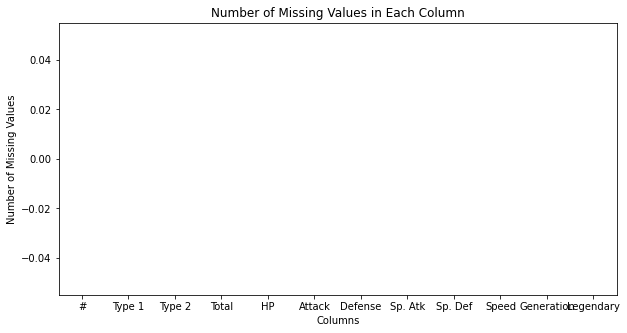

In [18]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [19]:
class_method = df.copy()

In [20]:
class_method

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,1.0,318,45,49,49,65,65,45,1,0
1,2,1,1.0,405,60,62,63,80,80,60,1,0
2,3,1,1.0,525,80,82,83,100,100,80,1,0
3,3,1,1.0,625,80,100,123,122,120,80,1,0
4,4,2,0.0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,12,5.0,600,50,100,150,100,150,50,6,1
796,719,12,5.0,700,50,160,110,160,110,110,6,1
797,720,11,16.0,600,80,110,60,150,130,70,6,1
798,720,11,12.0,680,80,160,60,170,130,80,6,1


### Classical Methods

__Undersampling__

is the most straightforward technique to balance an unbalanced data set. The idea is to reduce the number of samples in the majority class to the number equal to the number of samples in the minority class. Usually, it is done by randomly selecting m samples from the majority class, where m is the number of samples in the minority class.

In [11]:
!pip install imblearn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Separate features and target
X = class_method.drop('Legendary', axis=1)
y = class_method['Legendary']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and resample the data using RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Combine the resampled feature with the rest of the dataset
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=["Legendary"])], axis=1)

# Check the distribution of the Legendary feature after undersampling
print(resampled_df["Legendary"].value_counts())

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the resampled (balanced) training data
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

# Test the model on the testing data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_score)

0    50
1    50
Name: Legendary, dtype: int64
Confusion Matrix:
 [[192  33]
 [  1  14]]
Accuracy: 0.8583333333333333


In [27]:
resampled_df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,233,5,0.0,515,85,80,90,105,95,60,2,0
1,29,6,0.0,275,55,47,52,40,40,41,1,0
2,460,1,10.0,494,90,92,75,92,85,60,4,0
3,414,4,2.0,424,70,94,50,94,50,66,4,0
4,558,4,11.0,475,70,95,125,65,75,45,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,385,17,8.0,600,100,100,100,100,100,100,3,1
96,717,16,2.0,680,126,131,95,131,98,99,6,1
97,638,17,7.0,580,91,90,129,90,72,108,5,1
98,639,12,7.0,580,91,129,90,72,90,108,5,1


__Class Weights__

In the examples above with the confusion matrix, we saw that sometimes for a model, it is more convenient to classify all samples as majority class samples. A way to escape this situation is to penalize harder errors by misclassifying minority class samples. In the base case, every error during classification is equal to 1.

In [28]:
df_class_weight = df.copy()

In [29]:
df_class_weight

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,1.0,318,45,49,49,65,65,45,1,0
1,2,1,1.0,405,60,62,63,80,80,60,1,0
2,3,1,1.0,525,80,82,83,100,100,80,1,0
3,3,1,1.0,625,80,100,123,122,120,80,1,0
4,4,2,0.0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,12,5.0,600,50,100,150,100,150,50,6,1
796,719,12,5.0,700,50,160,110,160,110,110,6,1
797,720,11,16.0,600,80,110,60,150,130,70,6,1
798,720,11,12.0,680,80,160,60,170,130,80,6,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Separate features and target
X = df_class_weight.drop('Legendary', axis=1)
y = df_class_weight['Legendary']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=pd.unique(y_train), y=y_train)

# Create a dictionary mapping class labels to their respective weights
class_weight_dict = dict(zip(pd.unique(y_train), class_weights))

print(class_weight_dict)

# Create a logistic regression model with class_weight parameter
model = LogisticRegression(class_weight=class_weight_dict, max_iter = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", acc_score)


{0: 0.5490196078431373, 1: 5.6}
Confusion Matrix:
 [[212  13]
 [  0  15]]
Accuracy: 0.9458333333333333


### Oversampling

Oversampling is a technique that works backward to undersampling. Instead of reducing the size of the majority class, we are generating new samples for the minority class using different algorithms. The biggest family of such algorithms is SMOTE. There are also other algorithms that make this process in different ways.

__SMOTE__

(Synthetic Minority Oversampling Technique) is the simplest and the most popular oversampling algorithm

In [31]:
df_smote = df.copy()

In [32]:
df_smote

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,1,1.0,318,45,49,49,65,65,45,1,0
1,2,1,1.0,405,60,62,63,80,80,60,1,0
2,3,1,1.0,525,80,82,83,100,100,80,1,0
3,3,1,1.0,625,80,100,123,122,120,80,1,0
4,4,2,0.0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,12,5.0,600,50,100,150,100,150,50,6,1
796,719,12,5.0,700,50,160,110,160,110,110,6,1
797,720,11,16.0,600,80,110,60,150,130,70,6,1
798,720,11,12.0,680,80,160,60,170,130,80,6,1


In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Separate features and target
X = df_smote.drop('Legendary', axis=1)
y = df_smote['Legendary']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Fit and resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the resampled (balanced) training data
model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Test the model on the testing data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_score)

Confusion Matrix:
 [[219   6]
 [  2  13]]
Accuracy: 0.9666666666666667


__SMOTEENN__

One of the main drawbacks of SMOTE is that local outliers may influence it. Sometimes SMOTEcan take a minority sample that has only majority samples around, being in the middle of the majority class zone.

In [37]:
df_smoteenn = df.copy()

In [385]:
!pip install crucio

  Using cached crucio-0.1.94-py3-none-any.whl (29 kB)


In [39]:
from crucio import SMOTEENN 

smoteenn = SMOTEENN() 

balanced_df = smoteenn.balance(df_smoteenn, 'Legendary')

balanced_df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,380.741550,15.000000,8.000000,600.000000,80.000000,87.415505,82.584495,124.831010,115.168990,110.000000,3.0,1
1,483.255841,11.697690,0.000000,582.790759,74.302310,120.116173,72.790759,126.395379,72.790759,116.395379,4.0,1
2,379.521633,17.000000,0.695511,581.738777,81.738777,77.173471,145.653058,77.173471,145.653058,54.346942,3.0,1
3,645.940406,15.000000,10.119189,660.595944,124.255070,130.595944,90.893917,129.702028,90.297972,94.851014,5.0,1
4,382.967868,13.021421,4.042842,600.000000,65.160659,75.053553,124.625130,90.214212,144.839341,100.107106,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.000000,12.000000,5.000000,600.000000,50.000000,100.000000,150.000000,100.000000,150.000000,50.000000,6.0,1
796,719.000000,12.000000,5.000000,700.000000,50.000000,160.000000,110.000000,160.000000,110.000000,110.000000,6.0,1
797,720.000000,11.000000,16.000000,600.000000,80.000000,110.000000,60.000000,150.000000,130.000000,70.000000,6.0,1
798,720.000000,11.000000,12.000000,680.000000,80.000000,160.000000,60.000000,170.000000,130.000000,80.000000,6.0,1


In [41]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the features (X) and target variable (y)
X = df_smoteenn.drop('Legendary', axis=1)
y = df_smoteenn['Legendary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the minimum number of samples in any class
n_samples = df_smoteenn['Legendary'].value_counts().min() - 1

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an instance of EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=n_samples)

# Create a SMOTEENN instance with enn parameter set to the previously created EditedNearestNeighbours object
smoteenn = SMOTEENN(random_state=42, enn=enn)

# Apply SMOTEENN to the training dataset
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

# Test the model on the testing data
score = model.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 0.9541666666666667


__ICOTE__

(Immune centroids over-sampling method for multiclass classification) is an oversampling method out of the SMOTE family that generates new minority samples by trying to replicate the principles of Immune systems. ICOTE algorithm can be separated into two phases:

1. Clone generation


2. Mutains generation

In [92]:
df_icote =  df.copy()

In [94]:
from crucio import ICOTE 

icote = ICOTE() 

balanced_df = icote.balance(df_icote, 'Legendary')

print(balanced_df)

              #     Type 1    Type 2       Total          HP      Attack  \
0    117.000000   3.000000  0.000000  440.000000   55.000000   65.000000   
1    119.000000   3.000000  0.000000  450.000000   80.000000   92.000000   
2    124.000000  14.000000  8.000000  455.000000   65.000000   50.000000   
3    125.000000   7.000000  0.000000  490.000000   65.000000   83.000000   
4    126.000000   2.000000  0.000000  495.000000   65.000000   95.000000   
..          ...        ...       ...         ...         ...         ...   
353  685.995957  10.398839 -7.815095  715.261262  110.058058  120.029029   
354  691.660426  11.000000 -1.385924  760.170101  107.718477  143.112906   
355  691.660426  11.000000 -1.385924  760.170101  107.718477  143.112906   
356  745.577154  16.007769 -1.669256  695.178698   63.307435  150.904553   
357  756.426500  20.211589  0.000000  662.904298   84.605794  128.028972   

        Defense     Sp. Atk     Sp. Def       Speed  Generation  Legendary  
0     95.0

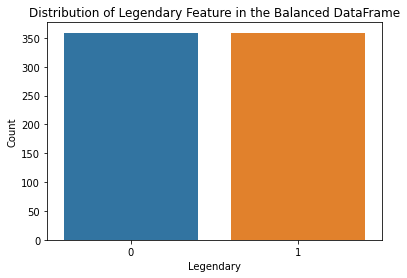

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming balanced_df is the output DataFrame from ICOTE balancing

# Visualize the distribution of the 'Legendary' feature in the balanced DataFrame
sns.countplot(x='Legendary', data = balanced_df)

plt.title('Distribution of Legendary Feature in the Balanced DataFrame')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.show()


__TKRKNN__

(Top-K Reversed KNN) has a very different way of generating new samples compared to the SMOTE family or ICOTE. The difference is that it generates new samples non-linearly- meaning that the new sample isn’t somewhere on the line that links two samples.

In [59]:
df_tkrnn = df.copy()

In [60]:
from crucio import TKRKNN 

tkrknn = TKRKNN() # parametri de vazut

tk_balanced_df = tkrknn.balance(df_tkrnn, 'Legendary')

tk_balanced_df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1.000000,1.000000,1.000000,318.000000,45.000000,49.000000,49.000000,65.000000,65.000000,45.000000,1.000000,0
1,2.000000,1.000000,1.000000,405.000000,60.000000,62.000000,63.000000,80.000000,80.000000,60.000000,1.000000,0
2,3.000000,1.000000,1.000000,525.000000,80.000000,82.000000,83.000000,100.000000,100.000000,80.000000,1.000000,0
3,3.000000,1.000000,1.000000,625.000000,80.000000,100.000000,123.000000,122.000000,120.000000,80.000000,1.000000,0
4,4.000000,2.000000,0.000000,309.000000,39.000000,52.000000,43.000000,60.000000,50.000000,65.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
665,656.722818,14.552445,6.486808,677.884790,111.133939,134.227038,88.977000,148.448724,93.336619,102.016990,5.387226,1
666,382.442799,11.214137,3.231106,669.358802,94.107298,128.127065,104.613616,147.552477,124.101365,103.301328,3.013623,1
667,382.283098,9.985420,1.577413,663.152520,91.682455,102.335083,99.323856,144.570387,117.574592,99.032141,3.036513,1
668,189.451313,6.545077,1.036314,588.377336,91.355764,95.300454,93.198953,126.383431,97.146224,114.578648,1.409237,1
